# ANOMALY DETECTION
   **AUTHOR - ABHIT YADAV**

In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [24]:
file_path = 'nse_all_stock_data (1).csv'
data = pd.read_csv(file_path)

In [25]:
data_filled = data.fillna(method='ffill').fillna(method='bfill')


In [26]:
stock_columns = data.columns[1:]
missing_counts = data[stock_columns].isnull().sum()
sorted_stocks = missing_counts.sort_values().index[:10]


In [27]:
stock_columns = data.columns[1:]  # Exclude the 'Date' column
missing_counts = data[stock_columns].isnull().sum()
sorted_stocks = missing_counts.sort_values().index[:10]

In [28]:
subset_data = data[['Date'] + list(sorted_stocks)].copy()

In [29]:
subset_data_cleaned = subset_data.dropna()

In [30]:
subset_data_cleaned.loc[:, 'Date'] = pd.to_datetime(subset_data_cleaned['Date'])

In [31]:
subset_data_cleaned.set_index('Date', inplace=True)

In [32]:
chosen_stock = sorted_stocks[0]
print("choosen stock for the analysis: ", chosen_stock)

choosen stock for the analysis:  TATAMOTORS


In [36]:
subset_data_cleaned.loc[:,chosen_stock] = pd.to_numeric(subset_data_cleaned[chosen_stock], errors='coerce')

In [37]:
subset_data_cleaned.loc[:,'Z-score'] = zscore(subset_data_cleaned[chosen_stock].dropna())


In [51]:
threshold = 2.5


In [52]:
anomalies = subset_data_cleaned[np.abs(subset_data_cleaned['Z-score']) > threshold]

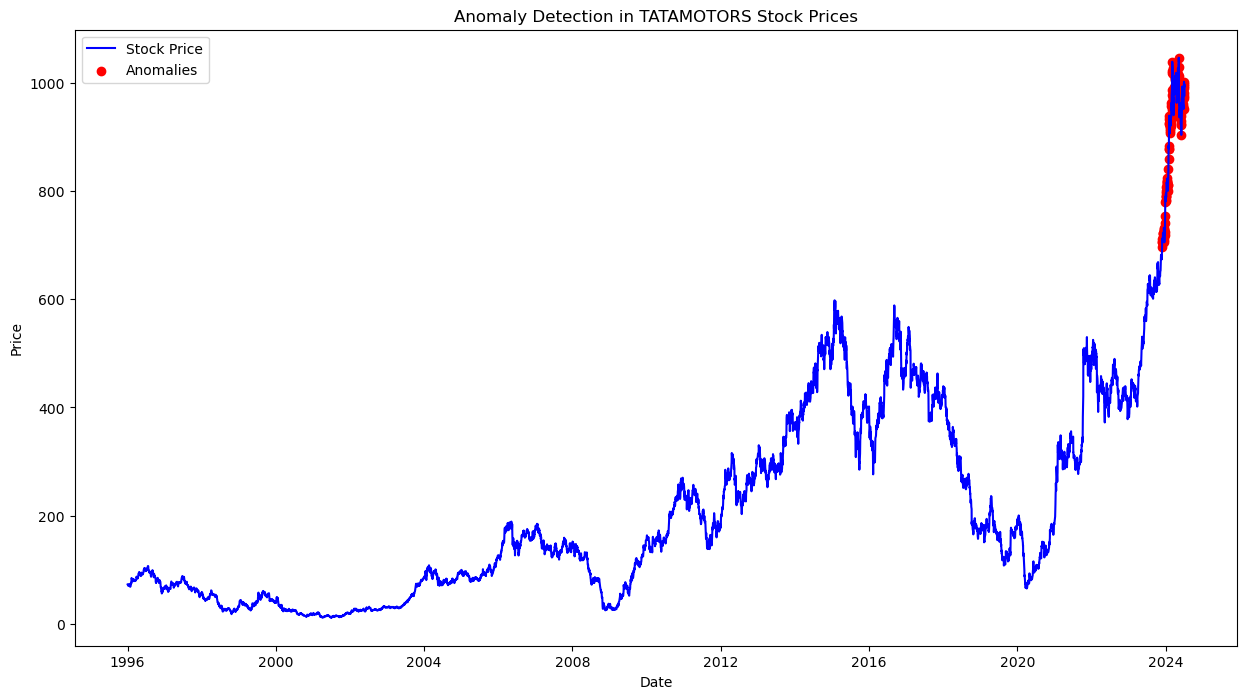

In [53]:
plt.figure(figsize=(15, 8))
plt.plot(subset_data_cleaned[chosen_stock], label='Stock Price', color='blue')
plt.scatter(anomalies.index, anomalies[chosen_stock], color='red', label='Anomalies', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Anomaly Detection in {chosen_stock} Stock Prices')
plt.legend()
plt.show()

**Top 5 anomalies in the data**

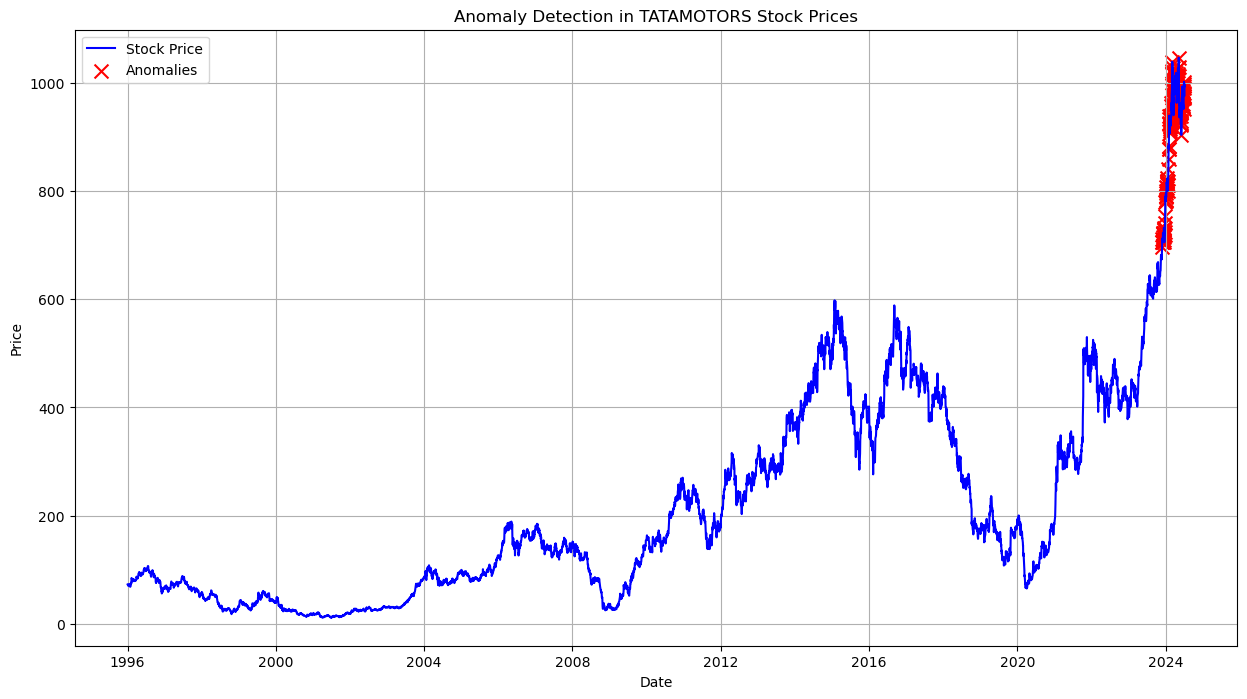

In [54]:
plt.figure(figsize=(15, 8))
plt.plot(subset_data_cleaned.index, subset_data_cleaned[chosen_stock], label='Stock Price', color='blue')
plt.scatter(anomalies.index, anomalies[chosen_stock], color='red', label='Anomalies', marker='x', s=100)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Anomaly Detection in {chosen_stock} Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
sorted_anomalies = anomalies.reindex(anomalies['Z-score'].abs().sort_values(ascending=False).index)

In [61]:
top_5_anomalies = sorted_anomalies.head(5)
print("Top 5 Most Significant Anomalies:")
print(top_5_anomalies)

Top 5 Most Significant Anomalies:
             TATAMOTORS        TITAN    RELINFRA          HIL    HINDALCO  \
Date                                                                        
2024-05-10  1046.650024  3289.850098  162.949997  2496.050049  625.599976   
2024-03-07  1039.300049  3786.899902  221.199997  2793.600098  536.700012   
2024-05-09  1030.300049  3245.699951  161.199997  2466.750000  619.400024   
2024-03-11  1028.000000  3750.149902  223.649994  2691.550049  533.700012   
2024-05-02  1027.800049  3568.449951  175.449997  2698.399902  641.450012   

              SUNPHARMA       IDBI        VEDL        SAIL   TATASTEEL  \
Date                                                                     
2024-05-10  1506.550049  83.599998  410.700012  156.899994  162.250000   
2024-03-07  1605.699951  85.500000  282.850006  138.949997  157.250000   
2024-05-09  1494.650024  83.449997  394.649994  153.050003  161.899994   
2024-03-11  1593.599976  84.099998  275.350006  134.3000

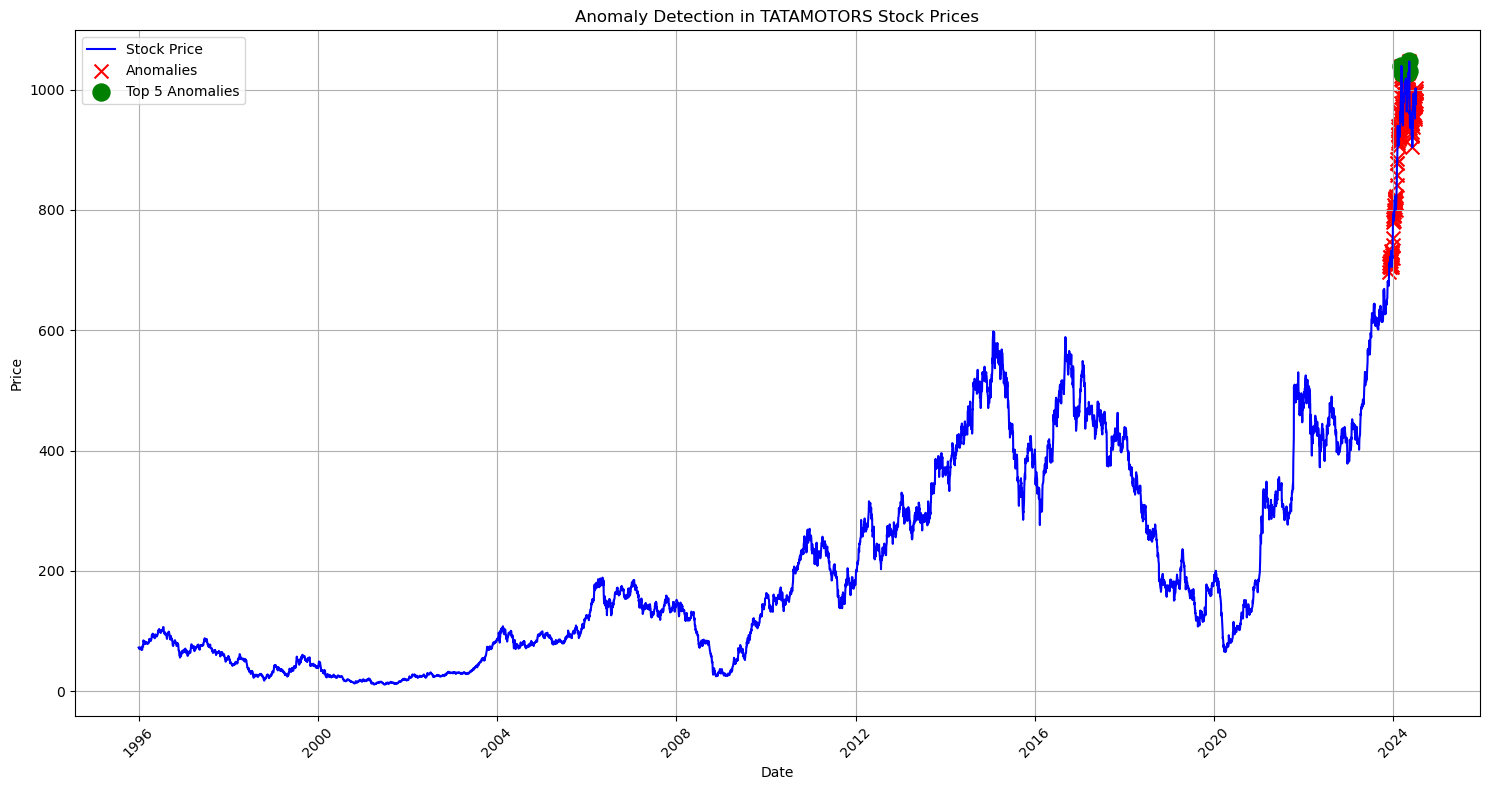

In [65]:
plt.figure(figsize=(15, 8))
plt.plot(subset_data_cleaned.index, subset_data_cleaned[chosen_stock], label='Stock Price', color='blue')
plt.scatter(anomalies.index, anomalies[chosen_stock], color='red', label='Anomalies', marker='x', s=100)
plt.scatter(top_5_anomalies.index, top_5_anomalies[chosen_stock], color='green', label='Top 5 Anomalies', marker='o', s=150)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Anomaly Detection in {chosen_stock} Stock Prices')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

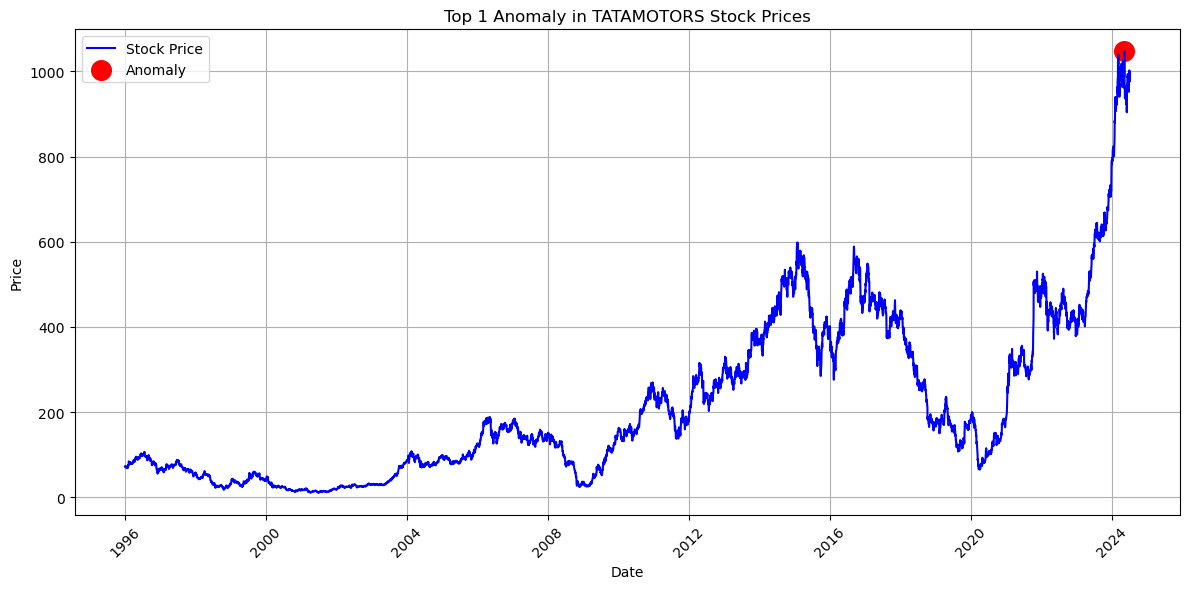

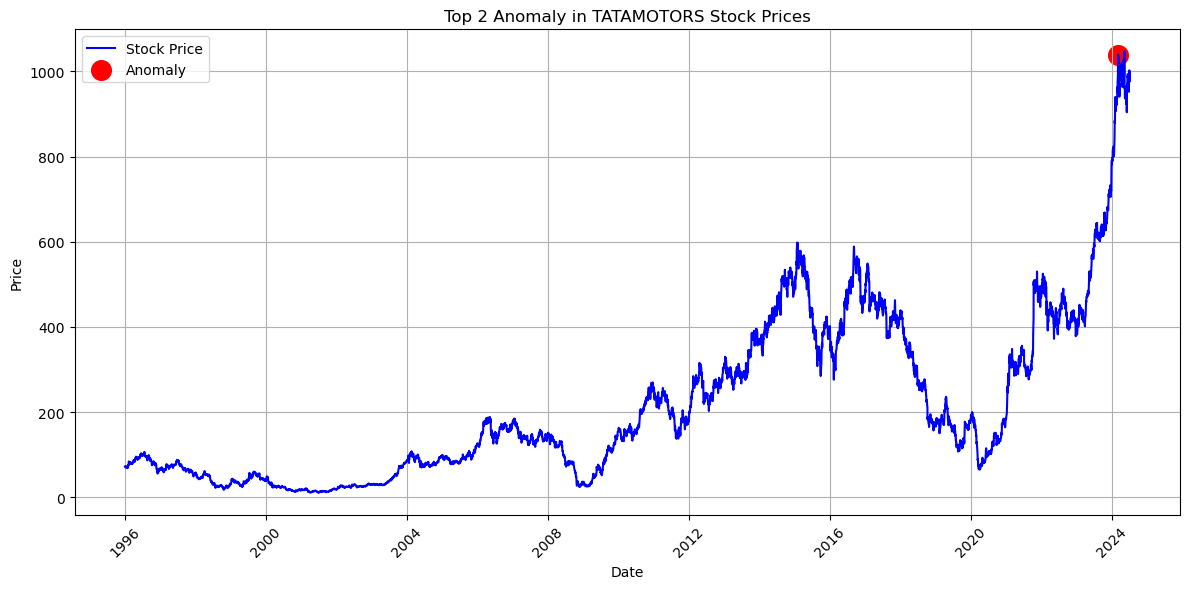

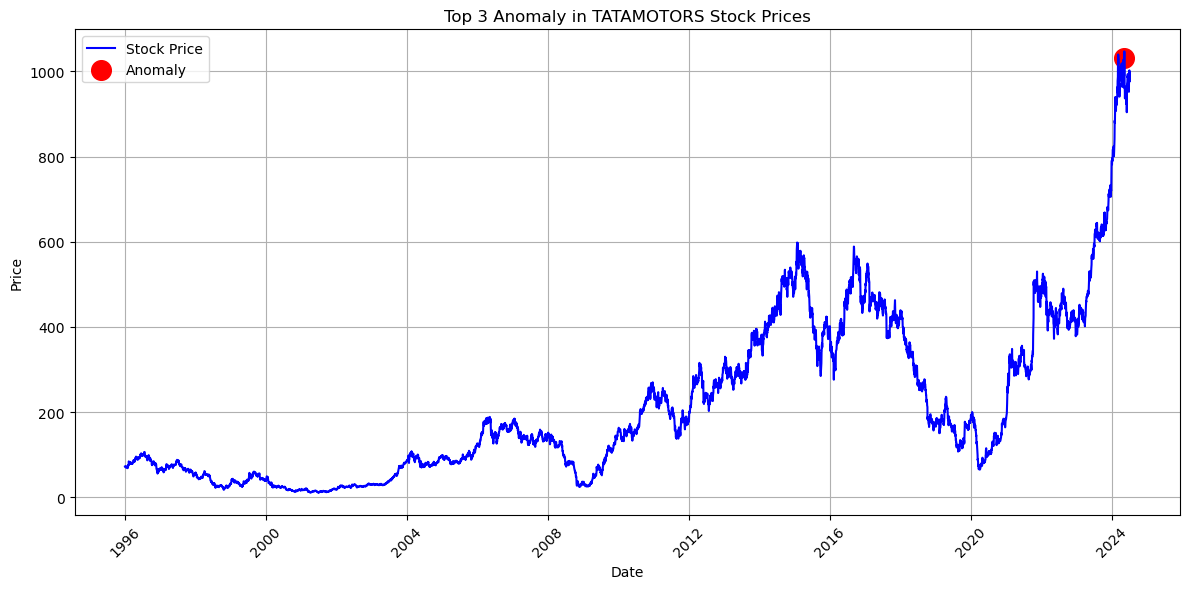

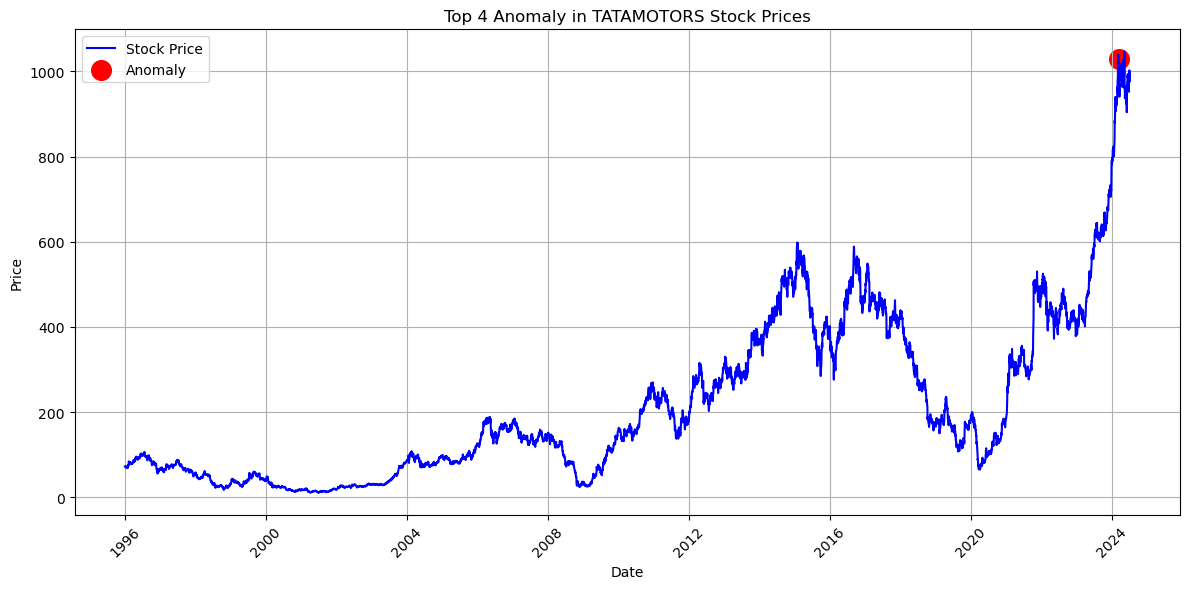

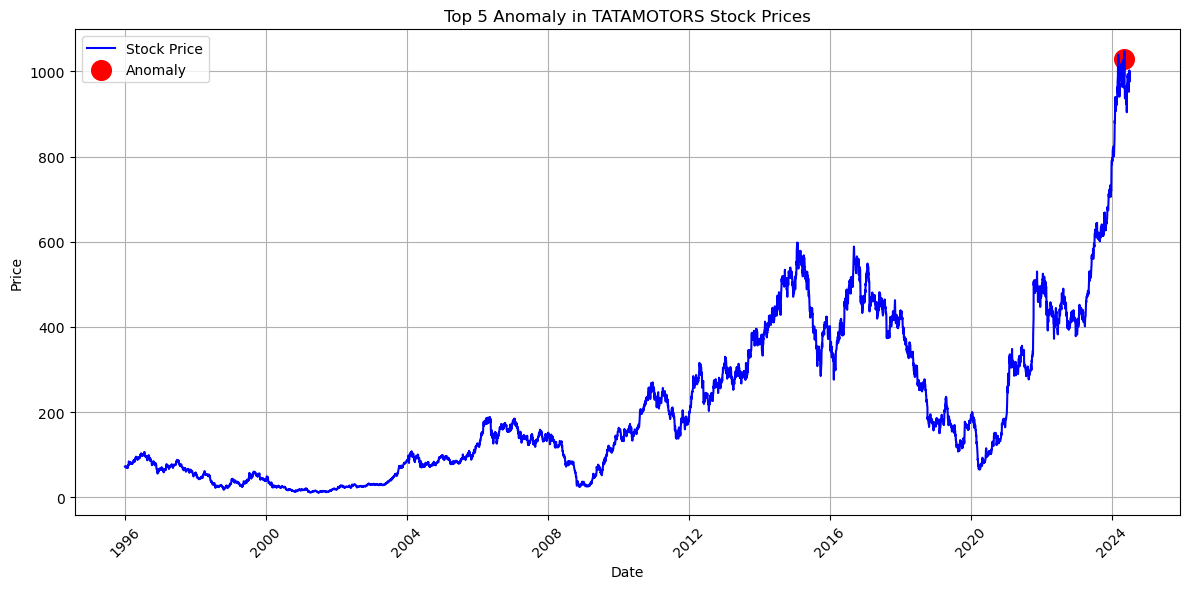

In [66]:
for i, (index, row) in enumerate(top_5_anomalies.iterrows(), start=1):
    plt.figure(figsize=(12, 6))
    plt.plot(subset_data_cleaned.index, subset_data_cleaned[chosen_stock], label='Stock Price', color='blue')
    plt.scatter([index], [row[chosen_stock]], color='red', label='Anomaly', marker='o', s=200)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Top {i} Anomaly in {chosen_stock} Stock Prices')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Investigating the anomalies

In [68]:
top_5_anomalies = sorted_anomalies.head(5)

In [69]:
print(top_5_anomalies)

             TATAMOTORS        TITAN    RELINFRA          HIL    HINDALCO  \
Date                                                                        
2024-05-10  1046.650024  3289.850098  162.949997  2496.050049  625.599976   
2024-03-07  1039.300049  3786.899902  221.199997  2793.600098  536.700012   
2024-05-09  1030.300049  3245.699951  161.199997  2466.750000  619.400024   
2024-03-11  1028.000000  3750.149902  223.649994  2691.550049  533.700012   
2024-05-02  1027.800049  3568.449951  175.449997  2698.399902  641.450012   

              SUNPHARMA       IDBI        VEDL        SAIL   TATASTEEL  \
Date                                                                     
2024-05-10  1506.550049  83.599998  410.700012  156.899994  162.250000   
2024-03-07  1605.699951  85.500000  282.850006  138.949997  157.250000   
2024-05-09  1494.650024  83.449997  394.649994  153.050003  161.899994   
2024-03-11  1593.599976  84.099998  275.350006  134.300003  153.449997   
2024-05-02  1519

In [78]:
for i, (index, row) in enumerate(top_5_anomalies.iterrows(), start=1):
    date = index
    price_movement = row[chosen_stock]
    print(f"Anomaly {i}")
    print(chosen_stock)
    z_score = row['Z-score']
    print(f"Date: {date}")
    print(f"Stock Price Movement: {price_movement}")
    print(f"Z-score: {z_score}")
    
    print("\n")

Anomaly 1
TATAMOTORS
Date: 2024-05-10 00:00:00
Stock Price Movement: 1046.6500244140625
Z-score: 4.332592545069552


Anomaly 2
TATAMOTORS
Date: 2024-03-07 00:00:00
Stock Price Movement: 1039.300048828125
Z-score: 4.294440386949469


Anomaly 3
TATAMOTORS
Date: 2024-05-09 00:00:00
Stock Price Movement: 1030.300048828125
Z-score: 4.247723303461776


Anomaly 4
TATAMOTORS
Date: 2024-03-11 00:00:00
Stock Price Movement: 1028.0
Z-score: 4.235784239780744


Anomaly 5
TATAMOTORS
Date: 2024-05-02 00:00:00
Stock Price Movement: 1027.800048828125
Z-score: 4.234746335826306




# ** Reasons for the Anomilies**

ANS: 
    We can look into and explain potential causes for these anomalies by taking into account a number of variables that could affect stock prices. These variables include news about the company, more general economic developments, the mood of the market, and unusual trading volumes. As precise explanations for the anomalies necessitate extensive historical data and news research for the particular dates of the anomalies.
    
    -> some possible causes below.
        
        1. Small Firms tend to Outperform
        2. Low book value
        3. Company specific news
        4. Trading Volume
        5. Sector-Specific trends
        

   